In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import *
from skimage.util import img_as_ubyte

In [ ]:
#Loading the image:
image = cv2.imread('/content/OrcusMouth-blured.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(image)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

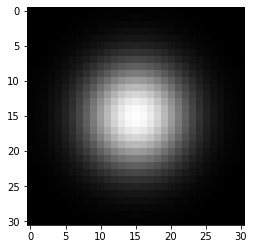

In [ ]:
#gaussian filter:
sigma = 5   #res1: 6 , 0.05
k_box = 31  #at least : (2*)3*sigma + 1
mean = (k_box - 1) / 2
gaussian_filter = np.zeros((k_box, k_box),dtype = np.float32)

for i in range(k_box):
  for j in range(k_box):
    gaussian_filter[i, j] = np.exp(-((i - mean)**2 + (j - mean)**2)/(2 * sigma**2))
#normalizing the filter:
gaussian_filter = gaussian_filter/np.sum(gaussian_filter) 
kernel = gaussian_filter
plt.imshow(gaussian_filter, cmap='gray')
plt.savefig('result-08.jpg')

In [ ]:
#box filter:
k_box = 9
kernel = np.ones(shape=(k_box, k_box)) / (k_box**2)

In [ ]:
def sharpening(image, kernel, a, name_smooth, name_mask, name_sharp):
  image_smooth = cv2.filter2D(src=image, ddepth=-1, kernel=kernel).astype(np.uint8)
  cv2.imwrite(name_smooth + '.jpg', image_smooth)
  unsharp_mask = image - image_smooth
  cv2.imwrite(name_mask + '.jpg', unsharp_mask)
  sharpened_image = image + a*unsharp_mask
  sharpened_image[sharpened_image < 0] = 0
  sharpened_image[sharpened_image > 255] = 255
  sharpened_image = sharpened_image.astype(np.uint8)
  cv2.imwrite(name_sharp + '.jpg', sharpened_image)
  return sharpened_image


In [ ]:
im1 = sharpening(image, kernel, 0.01, 'result-09', 'result-10', 'result-11')

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
cv2_imshow(im1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
im2 = sharpening(image, kernel, 0.08, 'result-12', 'result-13', 'result-14')

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
cv2_imshow(im2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#frequency domain:

In [ ]:
#fourier transform of the original image:
f = np.fft.fft2(image.astype(np.float32))
F_image = np.fft.fftshift(f)


In [ ]:
#high-pass gaussian filter (frequncy domain):
m, n, k = image.shape
H = np.zeros((m, n), dtype=np.float32)
D0 = 5
for u in range(m):
  for v in range(n):
    D = np.sqrt((u - m/2)**2 + (v - n/2)**2)
    H[u, v] = np.exp(-D**2 / (2*D0*D0))



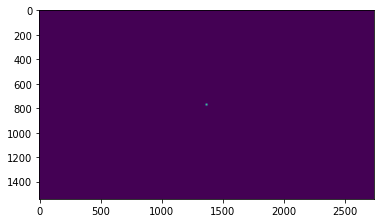

In [ ]:
plt.imshow(H)

In [29]:
H_hp = 1 - H
cv2.imwrite('result-16.jpg', 20*np.log10(H_hp).astype(np.uint8)) 

G = np.zeros((m, n, 3), dtype=np.complex_)
for k in range(3):
  G[:, :, k] = ((1 + 0.1*H_hp) * F_image[:, :, k])

I_shift = np.fft.ifftshift(G)
filtered = np.abs(np.fft.ifft2(I_shift)).astype(np.uint8)

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
cv2_imshow(np.abs(G))
cv2.imwrite('result-17.jpg', np.abs(G))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
cv2_imshow(filtered)
cv2.imwrite('result-18.jpg', filtered) 

Output hidden; open in https://colab.research.google.com to view.

In [31]:
#ideal high pass filetr(frequency domain):
m, n, k = image.shape
H_ideal = np.zeros((m, n), dtype=np.float32)
D0 = 5 
for u in range(m):
  for v in range(n):
    D = np.sqrt((u - m/2)**2 + (v - n/2)**2)
    if(D <= D0):
      H_ideal [u, v] = 0
    else:
      H_ideal [u, v] = 1

cv2.imwrite('result-19.jpg', 20*np.log1p(H_ideal).astype(np.uint8)) 

True

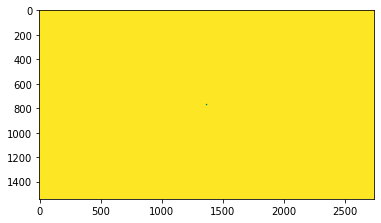

In [ ]:
plt.imshow(H_ideal)

In [ ]:
G = np.zeros((m, n, 3), dtype=np.complex_)
for k in range(3):
  G[:, :, k] = ((1 + 0.2*H_ideal ) * F_image[:, :, k])

I_shift = np.fft.ifftshift(G)
filtered = np.abs(np.fft.ifft2(I_shift)).astype(np.uint8)

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
cv2_imshow(np.abs(G))
cv2.imwrite('result-20.jpg', np.abs(G))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
cv2_imshow(filtered)
cv2.imwrite('result-21.jpg', filtered)


Output hidden; open in https://colab.research.google.com to view.